<a href="https://colab.research.google.com/github/Kridr/HW_ML_HSE/blob/main/HW3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

За последнее домашнее задание можно набрать 50 баллов – *таким образом, можно набрать до 5 дополнительных баллов*, которые могут помочь добрать где-либо ранее потерянные баллы, если есть такая необходимость.

**Дедлайн – 24 декабря, 23:59**. *Крайне приветствуется* сдача в ранний срок – работа будет проверена практически сразу (в рабочие часы) и студенту будет выставлены итоговые баллы**


---



**1.** (5 баллов) Вы разработали модель, которая страдает низким смещением и высокой дисперсией. Как Вы думаете, какой метод/алгоритм можно в таком случае применить и почему? 

В данном случае можно использовать модели, основанные на бэггинге. Хороший пример такого алгоритма - случайный лес. Свойство бэггинга - если базовые алгоритмы некоррелированы, то дисперсия композиции в N раз меньше дисперсии отдельных алгоритмов. Если же коррелиция имеет место, то уменьшение дисперсии может быть гораздо менее существенным. При этом, в данном случае смещение композиции будет примерно равно смещению базового алгоритма

**2.** (5 баллов) У Вас есть датафрейм `df_baguettes`, содержащий список цен на французские багеты. Но оказалось, что в этом датафрейме отсутствуют многие значения в столбце цен. По крайней мере несколько багетов имеют цену в столбце.
Напишите функцию `median_baguettes`, которая вычисляет медианную цену выбранных французских багетов вместо отсутствующих значений. 

In [1]:
import pandas as pd
import numpy as np

Два варианта. Один прямой средствами pandas, другой - ручной

In [2]:
def median_baguettes(df_baguettes):
    return df_baguettes.fillna(df_baguettes.median())

def median_baguettes2(df_baguettes):
    df_baguettes_c = df_baguettes.copy()
    l = []
    for i in df_baguettes_c.index:
        if not np.isnan(df_baguettes_c.at[i, 'price']):
            l.append(df_baguettes_c.at[i, 'price'])
    median = l[len(l) // 2]
    for i in df_baguettes_c.index:
        if np.isnan(df_baguettes_c.at[i, 'price']):
            df_baguettes_c.at[i, 'price'] = median

    return df_baguettes_c

Зададим датафрейм для проверки

In [3]:
df_b = pd.DataFrame.from_dict({'price': [0, np.nan, 2, 6, np.nan, np.nan]})
df_b

,price
0,0.0
1,NaN
2,2.0
3,6.0
4,NaN
5,NaN


Средствами pandas 

In [4]:
median_baguettes(df_b)

,price
0,0.0
1,2.0
2,2.0
3,6.0
4,2.0
5,2.0


Собственная функция

In [5]:
median_baguettes2(df_b)

,price
0,0.0
1,2.0
2,2.0
3,6.0
4,2.0
5,2.0


**3.** (5 баллов) Предположим, что у Вас есть набор данных как с непрерывными, так и с категориальными переменными. Какие методы кластеризации не помогут достичь высокого качества построенной модели при описанной ситуации с данными и почему? И какие методы кластеризации Вы бы использовали? 

В данном случае дело не столько в методах, сколько в способе метрического измерения. Евклидово расстояние, которое часто используется как норма по умолчанию, не подходит, так как непонятно как оно будет работать с категориальными переменными (вычитать категориальные признаки - просто бессмысленно и совершенно неинтерпретируемо). Это относится и к другим нормам.

В данном случае наилучший способ - обучить представления (эмбдеддинги) . Эмбеддинги - числовые признаки объектов, которые сохраняют свойства самих объектов. После получения представлений можно легко использовать самые классические методы, например, KMeans (и самые классические нормы для измерения расстояний)

**4.** Предположим, что перед Вами стоит задача: построить модель машинного обучения для прогнозирования заполняемости отеля в любую дату.


*   (2.5 баллов) Какие данные Вы бы использовали для обучения вашей модели? 
*   (10 баллов со скелетом кода, 5 баллов с письменным описанием) Какую бы модель Вы разработали? 
*   (2.5 баллов) Как бы Вы оценивали качество модели? 










С первого взгляда задача - классический time-series. То есть базово есть дата и есть количество посетителей в отеле. А дальше можно применить что-то вроде ARIMA (или ее модификаций) и получить достаточно качественный результат на обозримом горизонте. Но time-series - вне рамок этого курса.

В качестве альтернативы давайте будем решать задачу регрессии.
Дату можно разложить на несколько признаков:

1. Месяц (допустим, если отель на море, то логичнее будет, что в летние месяцы заполненность выше)
2. День месяца (возможно, это позволит как-то уточнить информацию о месяце. Например, может быть какой-то праздник в начале месяца, благодаря которому поток клиентов возрастет) 
3. День недели (на выходных, как мне кажется, заполняемость выше)

На самом деле, других признаков я здесь не вижу. В целом, можно взять какие-то усредненные данные о клиентах (среднее количество дней проживания всех клиентов, которые в данный день находятся в отеле), но проблема в том, что для будущего мы такую информацию просто не знаем и нахождение такой информации - не менее сложная задача (по сравнению с текущей). Также можно взять усредненные исторические данные (например, количество свободных мест на парковке) на какой-то день в году. В данном случае необходимо предположение о том, что такие данные репрезентативны и накапливались в течение многих лет. Думаю, что не для каждого отеля это предоположение будет возможно сделать.

Итогово: у нас изначально данные представлены как:
date -> number of clients




Проведем полное моделирование

In [6]:
#Образный датафрейм
df = pd.DataFrame.from_dict({
    'date': pd.date_range("2018-01-01", periods=1000, freq="D"), 
    'number_of_clients': np.random.randint(100, 300, size=1000)
}, orient='columns')
df.head()

,date,number_of_clients
0,2018-01-01,229
1,2018-01-02,190
2,2018-01-03,276
3,2018-01-04,238
4,2018-01-05,125


Переведем в признаки

In [7]:
df_p = df.copy()

df_p['month'] = df_p.date.dt.month
df_p['day'] = df_p.date.dt.day
df_p['day_of_week'] = df_p.date.dt.day_of_week

df_p.drop(columns='date', inplace=True)

df_p.head(10)

,number_of_clients,month,day,day_of_week
0,229,1,1,0
1,190,1,2,1
2,276,1,3,2
3,238,1,4,3
4,125,1,5,4
5,225,1,6,5
6,121,1,7,6
7,245,1,8,0
8,159,1,9,1
9,201,1,10,2


Просто делим датафрейм на признаки (Х) и таргет (у)

In [8]:
X = df_p.drop(columns='number_of_clients')
y = df_p['number_of_clients']

Делим на трейн и тест множества

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Теперь про модель. Так как признаки категориальные, то есть два выхода:

1. Перевести признаки в числовые с помощью One-Hot encoding, а затем обучить какую-то простую модель (например, логистическую регрессию). Небольшая проблема данного подхода в том, что количество признаков будет большим (12 + 31 + 7 = 50).
2. Использовать бустинг с встроенным учетом категориальных признаков (например, HistGradientBoostingRegressor из sklearn, либо CatBoost).

Давайте реализуем оба варианта

Оценивать модель будем с помощью $R^2$. Это метрика для задач регрессии удобна, так как выдает значение в промежутке от 0 до 1, то есть ее можно использовать для сравнения качества на данных различных отелей

Вариант 1

Будем использовать HuberRegressor, так как он использует хороший лосс - Huber loss, который объединяет достоинства MAE и MSE

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import r2_score

ohe = OneHotEncoder(handle_unknown='ignore')
X_train_p = ohe.fit_transform(X_train)
X_test_p = ohe.transform(X_test)

rr = HuberRegressor()
rr.fit(X_train_p, y_train)
y_pred = rr.predict(X_test_p)

print(f'R2: {r2_score(y_test, y_pred)}')

R2: -0.07290858441380399


Данные случайные, поэтому результат вполне ожидаемый

Вариант 2

Ограничимся реализацией из sklearn

In [11]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score

hgbr = HistGradientBoostingRegressor(categorical_features=[1] * len(X.columns))
hgbr.fit(X_train, y_train)
y_pred = hgbr.predict(X_test)

print(f'R2: {r2_score(y_test, y_pred)}')

R2: -0.13925651443478304


Данные опять же близки к случайным

В целом, вот два примера этой задачи. К сожалению, данные случайные, поэтому адекватно сравнить два подхода не получится

**5.** (10 баллов) У Вас есть строка, напоминающая объявление списка словарей. Не используя Pandas, напишите функцию `read_split_from_str`, которая:

*   Читает данные и кодирует их как список словарей (данные можно сгенерировать случайно при помощи numpy, например);
*   Разделяет данные на два списка: train и test в соотношении 70:30 и, соответственно, возвращает список `[training_set,testing_set]`. 

Пример входных данных:

`list_of_dict_string = "[{'x': 0, 'y': 4}, {'x': 20, 'y': 104}, {'x': 128, 'y': 212}]"`

Пример выходных данных:

```
def read_split_from_str(list_of_dict_string) 
    [
    [{'x': 0, 'y': 4}, {'x': 20, 'y': 104}],
    [{'x': 128, 'y': 212}]
    ]
```



Предположим, что в качестве данных могут быть либо строки, либо целые числа. А также предположим, что входная строка корректна всегда

In [12]:
import random
def str_to_val(s):
    """
    Переводит строку в значение: если есть кавычки, то значит строка, иначе - число
    """
    if (s[0] == '\'' or s[0] == '"') and (s[-1] == '\'' or s[-1] == '"'):
        return s[1:-1]
    else:
        return int(s)

def read_split_from_str(s, train_size=0.7, shuffle=True):
    s = s[1:-1]
    l_sd = []
    dict_s = ''
    was_prime = False #был ли символ "'". Нужен для случаев, когда скобка лежит внутри строки
    # Сначала выделяем строки словарей
    for e in s:
        if e == '{' and not was_prime:
            dict_s = ''
        elif e == '}' and not was_prime:
            l_sd.append(dict_s)
        elif e != ' ':
            if e == '\'' or e == '"':
                was_prime = not was_prime
            dict_s += e

    # Далее из каждого словаря-строки выделяем списки пар, 
    # которые потом без труда переводим в словарь с помощью средств питона 
    # (надеюсь это не чит)
    l_d = [] #список словарей
    for sd in l_sd:
        d = []
        was_prime = False
        is_first = True
        e1 = ''
        e2 = ''
        for e in sd + ',': #добавочная запятая, чтобы сильно не усложнять правила
            if e == ':' and not was_prime:
                is_first = False
            elif e == ',' and not was_prime:
                is_first = True
                d.append((str_to_val(e1), str_to_val(e2)))
                e1 = ''
                e2 = ''
            else:
                if e == '\'' or e == '\"':
                    was_prime = not was_prime
                if is_first:
                    e1 += e
                else:
                    e2 += e
        l_d.append(dict(d))

    # Перемешиваем список словарей 
    if shuffle:
        random.shuffle(l_d)

    # Находим индекс разделения. Все что до индекса - трейн, остальное - тест
    div_ind = int(len(l_d) * 0.7)
        
    return l_d[:div_ind], l_d[div_ind:]

Выведем результат с перемешиванием перед разделением на train и test. Доля трейна - 0.7

In [13]:
read_split_from_str("[{'x': 0, 'y': 4}, {'x': 20, 'y': 104}, {'x': 128, 'y': 212}]") 

([{'x': 128, 'y': 212}, {'x': 20, 'y': 104}], [{'x': 0, 'y': 4}])

**6.** (10 баллов) Разработайте модель классификации k-ближайших соседей не используя scikit-learn, соблюдая некоторые условия: 


*   В качестве метрики близости использовано евклидово расстояние;
*   Модель обратаывает датафреймы произвольного количества строк/столбцов.

In [14]:
from scipy.spatial import distance
from scipy.stats import mode
# Для подсчета попарных произведений воспользуемся функцией из scipy

class MyKNN():
    def __init__(self, neighbors=5):
        self.neighbors = neighbors
    

    def fit(self, X, y): #Просто запоминаем выборку
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    
    
    def predict(self, X):
        self.X_test = np.array(X)
        #Находим попарные расстояния между трейн и тест признаками
        distances = distance.cdist(self.X_test, self.X_train, 'euclidean')
        #Здесь первый шаг для нахождения таргетов ближайших соседей - 
        #используем argpartition для нахождения индексов партиций
        partitions = np.argpartition(distances, self.neighbors, axis=1)
        # далее используем полученные индексы для получения таргетов наименьших по расстоянию элементов
        neighbors_target = np.array([self.y_train[partitions[i][:self.neighbors]] for i in range(len(partitions))])
        # Берем самое популярное значение из таргетов ближайших соседей
        result = mode(neighbors_target, axis=1)[0]

        return result

Проверим на датасете вин

In [15]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Как видно, качество моей модели достаточно приличное

In [16]:
from sklearn.metrics import f1_score

f1_l = []
for neighbors in range(1, 11):
    model = MyKNN(neighbors)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    f1_l.append(f1_score(y_test, y_test_pred, average='weighted'))

Text(0, 0.5, 'F1')

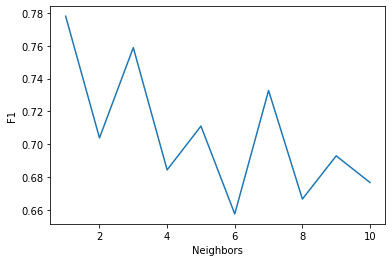

In [17]:
import matplotlib.pyplot as plt

plt.plot(list(range(1, 11)), f1_l)
plt.xlabel('Neighbors')
plt.ylabel('F1')

Разумеется это базовая модель. Она может быть улучшена с помощью различных эвристик выбора ближайших соседей (полный перебор - не всегда хорошая идея), также можно добавить веса для соседей (самый ближайший сосед имееет наибольший вес) и пр.